# Ask A Manager - Salary Survey

## Topics & Techniques Covered

* CSV vs. Excel files in Pandas
* Renaming columns in a Pandas DataFrame
* Converting strings to integers
* String methods in action
* Manipulating data with `.apply()` and `lambda`
* Filtering rows in Pandas
* Using data from multiple DataFrame columns
* Data preprocessing/integration/enrichment
* `datetime` and `dateutil` (for more, see PPW2 - Doctor Who)
* Pandas `.merge()` to join datasets

## Import

In [1]:
#Modules from Python Standard Library
from datetime import datetime

#External modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dateutil

Our first dataset comes from a Google Sheet that contains survey responses from employees in different management positions at different institutions, from 2021 to present. The survey was conducted as a [blog entry for Ask A Manager](https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html). The responses are collected in a Google Form and the questions are mostly short-form text response fields, with a few being multiple choice responses. This survey is real-world data, survey participants are all voluntary and self-selected. Most likely, the participants are followers of the Ask A Manager blog and/or the podcast.

Not all the responses are recorded in the correct fields, and there is no standardization in the text fields regarding formatting numbers or abbreviating currencies or regions.

This dataset is a *mess*, and as such, it's perfect for practicing several data-cleaning techniques.

We are *NOT* going to clean the entire dataset today.

Let's say we want to analyze the salary range of the survey's participants, and get summary statistics for the Salary variable. As we'll see, there are several obstacles in our way.

### Data Source


"Ask A Manager" Salary Survey, 2021:

https://docs.google.com/spreadsheets/d/1IPS5dBSGtwYVbjsfbaMCYIWnOuRmJcbequohNxCyGVw/edit?resourcekey=&gid=1625408792#gid=1625408792

# Exploratory Data Analysis (EDA) & Data Cleaning

You'll often see Exploratory Data Analysis (EDA) and data cleaning described as separate stages of a data science/data analysis project, but most of the time, exploring and cleaning the data are closely intertwined. To explore the data and find out what it contains, some cleaning is necessary. And in order to clean data with care, one must know what more about what's in it.

## Differences between CSV and Excel Imports in Pandas

"Data cleaning" can begin before you even load the data into Pandas. Often, data is available in different formats, and it is important to know how those formats can behave differently when imported using Pandas. These differences can increase or reduce the amount of effort necessary to make sure data is usable in a statistical model.

We have downloaded the "Ask A Manager" survey data from the original Google Sheet as both `.csv` (Comma-Separated Values) and `.xlsx` (Microsoft Excel Spreadsheet) files. The data is identical, but it's *represented* differently depending on which format it's imported from.

In [2]:
#Read .csv file from The Claremont Colleges Library's GitHub page:
df_csv = pd.read_csv('https://raw.githubusercontent.com/ClaremontCollegesLibrary/PersnicketyPython/refs/heads/main/Ask%20A%20Manager%20Salary%20Survey%202021%20(Responses)%20-%20Form%20Responses%201.csv')

In [3]:
#Read .xlsx file from The Claremont Colleges Library's GitHub page:
df_xl = pd.read_excel('https://raw.githubusercontent.com/ClaremontCollegesLibrary/PersnicketyPython/refs/heads/main/Ask%20A%20Manager%20Salary%20Survey%202021%20(Responses).xlsx')

In [4]:
#The ".equals()" method determines equivalency across two entire DataFrames (or columns of DataFrames). 
df_csv.equals(df_xl)

False

In [5]:
df_csv.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Renaming Columns in Pandas

Before moving forward, let's declutter those column names to make our comparison a bit more manageable. Part of the data-cleaning process is making quality-of-life adjustments, such as reducing on-screen clutter.

We'll take a moment to read the column names and absorb their meaning, and then rename them to shorter column names in a consistent format.

We have chosen to label the columns with capitalized words, separated by underscores. Longer words have been abbreviated as a space consideration.

Because we are renaming *all* of the columns, we can simply pass in a new list of the same length as the number of columns. This is a quick way to rename the columns given the length of the existing column names.

A "safer" (i.e.: less error-prone) way of renaming columns would be to use the pandas method `.rename()`. With this method, you can pass a dictionary to the "columns" keyword argument (containing old names as keys and new names as values), in this format: `.rename(columns={"old_name1":"new_name1", "old_name2":"new_name2"})`

In [6]:
df_csv.columns

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [7]:
new_columns = [
    'Timestamp', 'Age', 'Industry', 'Job_Title', 'Addl_Context', 'Salary',
    'Addl_Comp', 'Currency', 'Curr_if_Other', 'Income_Context',
    'Country', 'US_State', 'City', 'Work_Exp', 'Field_Exp', 'Educ_Level',
    'Gender', 'Race'
]

In [8]:
#Use dictionary comprehension to create dictionary from array of columns, new column names
data_dict = {old:new for old, new in zip(df_csv.columns, new_columns)}

In [9]:
#Verify that 
data_dict

{'Timestamp': 'Timestamp',
 'How old are you?': 'Age',
 'What industry do you work in?': 'Industry',
 'Job title': 'Job_Title',
 'If your job title needs additional context, please clarify here:': 'Addl_Context',
 "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'Salary',
 'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.': 'Addl_Comp',
 'Please indicate the currency': 'Currency',
 'If "Other," please indicate the currency here: ': 'Curr_if_Other',
 'If your income needs additional context, please provide it here:': 'Income_Context',
 'What country do you work in?': 'Country',
 "If you're in the U.S., what state do you work in?": 'US_State',
 'What city do you work i

In [10]:
df_csv.rename(columns=data_dict, inplace=True)

In [11]:
df_xl.rename(columns=data_dict, inplace=True)

These new names mostly capture the gist of the original questions. Please keep in mind that Country, US_State, and City all refer to the location of the job, not the location of residence.

In [12]:
df_csv.head()

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [13]:
df_xl.head()

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


Right away, we can see that the "Timestamp" column looks different. So does "Salary".

In [14]:
df_xl['Timestamp'].describe()

count                            28106
mean     2021-05-16 20:00:20.833426432
min         2021-04-27 11:02:09.743000
25%      2021-04-27 14:21:57.530749952
50%      2021-04-28 13:58:23.371000064
75%      2021-04-29 20:58:00.774749952
max         2025-01-16 10:00:46.663000
Name: Timestamp, dtype: object

In [15]:
df_csv['Timestamp'].describe()

count                  28106
unique                 25324
top       4/27/2021 12:05:06
freq                       5
Name: Timestamp, dtype: object

In [16]:
df_xl['Salary'].describe()

count    2.810600e+04
mean     3.619435e+05
std      3.619466e+07
min      0.000000e+00
25%      5.400000e+04
50%      7.500000e+04
75%      1.097000e+05
max      6.000070e+09
Name: Salary, dtype: float64

*(Note: since there is no standardized currency unit, the statistics here for Salary don't really mean anything... yet.)*

In [17]:
df_csv['Salary'].describe()

count      28106
unique      4318
top       60,000
freq         430
Name: Salary, dtype: object

But the differences aren't limited to those two columns...

Unlike the `.equals()` method, using "==" on two DataFrames will return a Boolean value for *each cell.*

In [18]:
df_xl == df_csv

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race
0,False,True,True,True,False,False,True,True,False,False,True,True,True,True,True,True,True,True
1,False,True,True,True,False,False,True,True,False,False,True,False,True,True,True,True,True,True
2,False,True,True,True,False,False,False,True,False,False,True,True,True,True,True,True,True,True
3,False,True,True,True,False,False,True,True,False,False,True,True,True,True,True,True,True,True
4,False,True,True,True,False,False,True,True,False,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28101,False,True,True,True,False,False,False,True,False,False,True,True,True,True,True,True,True,True
28102,False,True,True,True,False,False,True,True,False,False,True,False,True,True,True,True,True,True
28103,False,True,True,True,False,False,False,True,False,False,True,True,True,True,True,True,True,True
28104,False,True,True,True,False,False,True,True,False,False,True,True,True,True,True,True,True,True


Some of the columns are identical, some of them have no common values, and some of them have some values that match and some that don't.

In [19]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28106 entries, 0 to 28105
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       28106 non-null  object 
 1   Age             28106 non-null  object 
 2   Industry        28031 non-null  object 
 3   Job_Title       28105 non-null  object 
 4   Addl_Context    7273 non-null   object 
 5   Salary          28106 non-null  object 
 6   Addl_Comp       20792 non-null  float64
 7   Currency        28106 non-null  object 
 8   Curr_if_Other   211 non-null    object 
 9   Income_Context  3047 non-null   object 
 10  Country         28106 non-null  object 
 11  US_State        23072 non-null  object 
 12  City            28024 non-null  object 
 13  Work_Exp        28106 non-null  object 
 14  Field_Exp       28106 non-null  object 
 15  Educ_Level      27883 non-null  object 
 16  Gender          27935 non-null  object 
 17  Race            27929 non-null 

In [20]:
df_xl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28106 entries, 0 to 28105
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       28106 non-null  datetime64[ns]
 1   Age             28106 non-null  object        
 2   Industry        28031 non-null  object        
 3   Job_Title       28105 non-null  object        
 4   Addl_Context    7273 non-null   object        
 5   Salary          28106 non-null  int64         
 6   Addl_Comp       20792 non-null  float64       
 7   Currency        28106 non-null  object        
 8   Curr_if_Other   211 non-null    object        
 9   Income_Context  3047 non-null   object        
 10  Country         28106 non-null  object        
 11  US_State        23072 non-null  object        
 12  City            28024 non-null  object        
 13  Work_Exp        28106 non-null  object        
 14  Field_Exp       28106 non-null  object        
 15  Ed

Notice that the counts of non-null objects are the same, but Timestamp and Salary show different data types. They are listed as "objects" in the .csv import, but `datetime64[ns]` and `int64` respectively in the xlsx import. The Pandas `read_excel()` method automatically reformats dates into a pandas timestamp, whereas `read_csv()` imports them literally as strings.

When evaluating Boolean expressions, `NaN` values in Python don't equal *anything*, even other `NaN` values.

In the original spreadsheet, many (but not all) of the `Salary` figures are formatted using commas to separate thousands.

`read_excel()` is built with this contingency in mind, and automatically converts numbers formatted this way into standard integers. `read_csv()` imports the entire column as strings regardless of their original formatting, because at least one of them has a comma in it.

Because of these differences, importing Excel files will usually be more reliable than importing csv files with respect to data integrity.

For this dataset, we *could* just use the imported Excel file rather than the csv file, because it would be easier to work with data that's already formatted the way we want.

However, you won't always have access to both csv and .xlsx versions of a spreadsheet in the wild.

### *Note: Why not always use Excel files instead of .csv?*

Excel files have many advantages over .csv for purposes of data integrity. `.read_excel()` can also handle Excel files with multiple sheets using the [`sheet_name` parameter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html), which can be a useful feature.

*That said*, Excel files can take significantly longer to import than .csv files. If you are working with a high volume of data, or if your project requires that you repeatedly import files, .csv may be a better format from a computational performance standpoint.


# End Goal: Salary & Total Compensation Statistics.

## Related Columns: "Currency", "Curr_if_Other", "Country", "Addl_Comp"

Our end goal is to get summary statistics for total compensation (Salary + Addl_Comp). To do this, we will need data from multiple columns in the dataset, including "Salary", "Currency", "Curr_if_Other", "Country", "Addl_Comp", and "Timestamp".

As we saw in `PPW0 - Text Data Cleaning Introduction`, the `.apply()` method and `lambda` statements can be used to edit all values in a column at once

Using a lambda function allows us to apply a string method to a DataFrame column, assuming all the data are of the same type.

Not all tasks involving data manipulation in Pandas can be accomplished with `.apply(lambda)`, but a huge portion of them can.

## Salary

The Salary column is currently in string format. We would like to convert it to integer format so we can get summary statistics from it.

### EXAMPLE: Cleaning Data using `.apply()` and `lambda`

In [21]:
#### Try this!
#Uncomment the code below:

#df_csv['Salary'] = df_csv['Salary'].apply(int)

We get `"ValueError: invalid literal for int() with base 10: '55,000'"`.

### CODING EXERCISE: `.apply()` and `lambda`

The `int()` function won't work by itself to convert the Salary field from strings to integers, because of the commas. Unlike pandas `read_excel()`, `int()` isn't set up to automatically handle in strings of numerical characters.

What do you think would work best in the lambda statement?

In [22]:
# Try using `.apply()` and `lambda` to clean the Salary column data:

################################################################################
################################################################################

df_csv['Salary'] = df_csv['Salary']

################################################################################
################################################################################

#### (Solution)

In this case, all the items in our "Salary" column are strings, so we can use the `.replace()` method to clear out the commas, and then wrap the resulting string in an `int()` function to change the type to integer.

In [23]:
df_csv['Salary'] = df_csv['Salary'].apply(lambda x: int(x.replace(',','')))

In [24]:
#No more commas!
df_csv['Salary'].equals(df_xl['Salary'])

True

In [25]:
df_csv['Salary']

0          55000
1          54600
2          34000
3          62000
4          60000
          ...   
28101      75000
28102      25000
28103      72800
28104     100000
28105    1000000
Name: Salary, Length: 28106, dtype: int64

All clean! ...or is it?

### QUESTION: What's missing from the Salary column?

#### (Answer)

Currency units.

In order to normalize the Salary column and produce summary statistics for it, we have to convert the totals to the same currency. We'll go with USD.

## Currency

`.unique()` is a method for a Pandas Series object that returns all extant values of the series with no duplicates. The order of the series returned matches the order of first appearance starting with the first row.

In [26]:
df_csv['Currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

The `.value_counts()` method is similar to `.unique()`, but it returns the count of each value in a Series in descending order. `.value_counts()` is especially useful for determining the composition of categorical variables.

In [27]:
df_csv['Currency'].value_counts()

Currency
USD        23408
CAD         1675
GBP         1592
EUR          646
AUD/NZD      504
Other        164
CHF           37
SEK           37
JPY           23
ZAR           16
HKD            4
Name: count, dtype: int64

### What's unusual about the Currency column?

* Australian Dollars and New Zealand Dollars aren't the same.

* "Other" isn't a currency; there's a whole separate column that denotes currency if "Other" is what's listed in the Currency column.

Both of these issues prevent us from simply using the data as it is.

Can we still use this data? Let's take a closer look. Let's filter the DataFrame to show only entries with "AUD/NZD" listed under Currency:

In [28]:
df_csv[df_csv['Currency'] == 'AUD/NZD']

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race
139,4/27/2021 11:05:51,35-44,Surveying,Accounts manager,NaN,85000,0.0,AUD/NZD,NaN,NaN,Australia,NaN,Perth,11 - 20 years,8 - 10 years,Master's degree,Man,White
470,4/27/2021 11:10:23,35-44,Health care,Doctor (Psychiatry registrar),NaN,134800,30000.0,AUD/NZD,NaN,First year training,Australia,NaN,Perth,8 - 10 years,2 - 4 years,PhD,Woman,Asian or Asian American
1188,4/27/2021 11:21:34,25-34,Education (Higher Education),Assistant professor,NaN,120000,20000.0,AUD/NZD,NaN,NaN,Australia,NaN,Perth,11 - 20 years,5-7 years,PhD,Man,Asian or Asian American
1362,4/27/2021 11:24:31,35-44,Education (early childhood),Early childhood educator,NaN,60000,0.0,AUD/NZD,NaN,NaN,Australia,NaN,Melbourne,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin"
2368,4/27/2021 11:42:58,35-44,Nonprofits,Field Coordinator,NaN,51600,NaN,AUD/NZD,NaN,NaN,Australia,NaN,Sydney,11 - 20 years,5-7 years,Master's degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27844,7/13/2022 20:19:39,18-24,Environmental science,Environmental Data Manager,NaN,70000,1000.0,AUD/NZD,NaN,NaN,Australia,NaN,Perth,2 - 4 years,2 - 4 years,College degree,Man,White
27951,4/1/2023 20:04:40,35-44,Education (Primary/Secondary),Teacher,NaN,104000,2000.0,AUD/NZD,NaN,Band 2 (of three) of the independent schools m...,Australia,NaN,"Maitland, NSW",5-7 years,5-7 years,College degree,Woman,White
27962,6/8/2023 4:35:52,45-54,Health care,Business Development Director,NaN,185000,22000.0,AUD/NZD,NaN,NaN,Australia,NaN,Sydney,21 - 30 years,1 year or less,College degree,Other or prefer not to answer,White
27997,11/30/2023 23:21:19,35-44,Sales,Business Development Manager,NaN,80000,45000.0,AUD/NZD,NaN,NaN,Australia,NaN,Melbourne,11 - 20 years,5-7 years,College degree,Woman,White


There are 504 rows where the currency is AUD/NZD... that's not a huge number relative to the size of our dataset, but we still don't want to throw out those entries; it would be best if we could salvage that data somehow.

### Determining AUD/NZD by Country

We can try to solve this issue by splitting the AUD/NZD category based on the user's answer in the `Country` field. This may not work for all of the entries in question, but it will improve the accuracy of our summary statistics.

To get a list of countries where the currency is listed as AUD/NZD, we can use `.tolist()`, which converts a Pandas Series object (such as what's returned by the `.unique()` method).

In [29]:
df_csv[df_csv['Currency'] == 'AUD/NZD']['Country'].unique().tolist()

['Australia ',
 'Australia',
 'New Zealand',
 'New Zealand ',
 'New Zealand Aotearoa',
 'New zealand',
 'NZ',
 'australia',
 ' New Zealand',
 'Australi',
 'Canada',
 'new zealand',
 'From New Zealand but on projects across APAC',
 'USA',
 'Aotearoa New Zealand']

We got mostly what we expected: variations on Australia and New Zealand with different spelling, capitalization, extra whitespace, etc.

However, there are three results that warrant further investigation: USA, Canada, and "From New Zealand but on projects across APAC". In a dataset this large, three entries is an incredibly small number, and likely won't have a huge impact on our summary statistics, but for purposes of demonstration, we're going to try to correct them here.

### Filtering DataFrames on Multiple Conditions

Multiple conditions can be applied to filter DataFrames. In order to filter on multiple conditions, each condition (a Series object of the same length as the DataFrame) should be wrapped with parentheses. 

Use "&" and "|" instead of "and" and "or" in order to combine multiple conditions.

In [30]:
df_csv[(df_csv['Currency'] == 'AUD/NZD') & (df_csv['Country'] == 'USA')]

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race
25510,5/6/2021 18:12:16,25-34,Transport or Logistics,Customer Service Rep/Dispatcher,NaN,30000,NaN,AUD/NZD,NaN,NaN,USA,New Jersey,Westampton,11 - 20 years,8 - 10 years,College degree,Woman,Black or African American


Since filter conditions are Series objects, they can be stored as variables. When we do this, we don't have to use parentheses for multiple conditions.

We won't always use this syntax, but it can help make filtering a much tidier process.

In [31]:
#Define Pandas Series objects with True/False values for each condition
currency_audnzd = df_csv['Currency'] == 'AUD/NZD'
country_canada_or_apac = (df_csv['Country'] == 'Canada') | (df_csv['Country'] == 'From New Zealand but on projects across APAC')

#Apply conditions
df_csv[currency_audnzd & country_canada_or_apac]

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race
17426,4/28/2021 20:25:20,45-54,"Accounting, Banking & Finance",Manager,NaN,110000,10000.0,AUD/NZD,NaN,NaN,Canada,NaN,Ottawa,21 - 30 years,11 - 20 years,NaN,Woman,White
22585,4/30/2021 21:22:49,45-54,Business or Consulting,Workplace Strategist,NaN,180000,NaN,AUD/NZD,NaN,NaN,From New Zealand but on projects across APAC,NaN,Wellington,21 - 30 years,11 - 20 years,College degree,Woman,White


Neither the American nor the Canadian respondent indicates which country's currency they are paid in.

We're going to assume this last one is "NZD" as a default since the respondent lives in New Zealand, but the Salary figure may or may not represent 100% New Zealand Dollars.

### *Hold That Thought*

Before we continue with cleaning our AUD/NZD currencies, we're going to take a look at the "Curr_if_Other" column and determine if more cleaning is necessary before we integrate it into the "Currency" column. 

Because we're working with multiple columns of data, we want to make sure that we're applying the same standards for data cleaning across those columns. As we'll see in a moment, the "Curr_if_Other" column becomes much easier to work with if all the values are set to lower case, and leading and trailing whitespace is removed. Since we're doing this with "Curr_if_Other", it also makes sense to follow the same procedure with other columns, *before* we begin to substitute currency values based on the country of residence.

Once we've done that, we can return to resolving the AUD/NZD issue.

Cleaning data is seldom a purely linear process, and it's quite common that one process will need to be put on hold until another is completed.

## Curr_if_Other

Counting AUD and NZD separately, there are only 11 currencies listed in the Currency column... but then there's "Other".

In [32]:
df_csv[df_csv['Currency'] == 'Other']

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race
434,4/27/2021 11:09:54,25-34,Computing or Tech,Data analyst,NaN,885000,0.0,Other,INR,NaN,India,NaN,Pune,2 - 4 years,2 - 4 years,Master's degree,Woman,Asian or Asian American
603,4/27/2021 11:12:24,45-54,Health care,Exec admin,Located in Argentina,1080000,223000.0,Other,Peso Argentino,Exchange about 1USD=165ARS,Argentina,NaN,City of Buenos Aires,11 - 20 years,11 - 20 years,College degree,Woman,"Hispanic, Latino, or Spanish origin"
1311,4/27/2021 11:23:39,25-34,Government and Public Administration,Associate,NaN,80640,20160.0,Other,MYR,NaN,Malaysia,NaN,Kuala Lumpur,5-7 years,2 - 4 years,College degree,Woman,Another option not listed here or prefer not t...
1840,4/27/2021 11:33:16,35-44,Intergovernmental organization,Consultant,NaN,60000,0.0,Other,CHF,"While I work full time at an organization, I a...",Switzerland,NaN,Geneva,11 - 20 years,5-7 years,Master's degree,Woman,Black or African American
1924,4/27/2021 11:34:55,35-44,Sales,CEO,NaN,800000,100000.0,Other,NOK,NaN,Norway,NaN,Oslo,11 - 20 years,11 - 20 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28061,8/20/2024 1:06:13,25-34,Health care,Clinical physiologist,NaN,1200000,NaN,Other,NGN,NaN,Nigeria,NaN,Lagos,2 - 4 years,2 - 4 years,College degree,Woman,Black or African American
28077,9/19/2024 19:16:28,25-34,Social Work,Counsellor,NaN,40000,0.0,Other,SGD,NaN,Singapore,NaN,Singapore,8 - 10 years,8 - 10 years,Master's degree,Woman,Asian or Asian American
28096,11/24/2024 8:08:37,25-34,Business or Consulting,BI Consultant,NaN,10,NaN,Other,Rupees,NaN,India,NaN,Noida,2 - 4 years,2 - 4 years,College degree,Man,Another option not listed here or prefer not t...
28100,12/11/2024 14:53:19,25-34,Health care,Pharmacist,NaN,24000000,2000000.0,Other,TZS,full time pharmacist and superintendent,Tanzania,NaN,Dar es Salaam,2 - 4 years,2 - 4 years,College degree,Woman,Black or African American


Using the same `.value_counts()` method as before, we can apply the `.head()`method to get a specific number of categories. If no argument is passed to `.head()`, it will display 5 values, but we want to see more currencies.

In [33]:
df_csv['Curr_if_Other'].value_counts().head(40)

Curr_if_Other
INR                                                                                                     11
SGD                                                                                                     11
USD                                                                                                     11
NOK                                                                                                     10
DKK                                                                                                      8
MYR                                                                                                      8
AUD                                                                                                      7
BRL                                                                                                      6
PLN                                                                                                      5
CZK                    

That's a lot of different values, some of which are clearly extraneous. 

Because Python is case-sensitive, "ILS" and "Ils" (Israeli New Shekels) are treated as different categories.

We can make it easier to match up categories in the Curr_if_Other column (and several others) by lowering the case of all the strings.

## Removing Whitespace and Converting to Lower Case

Normalizing our survey responses will be easier if we can remove excess whitespace and convert all text to lower case:

### CODING EXERCISE - Lowercase & Removing Whitespace

Recall the string methods from PPW0 - Text Data Cleaning Introduction and use them in a .apply(lambda) statement to clean the Country column:

In [34]:
################################################################################
################################################################################

df_csv['Country'] = df_csv['Country']

################################################################################
################################################################################

#### (Solution)

In [35]:
df_csv['Country'] = df_csv['Country'].apply(lambda x: x.lower().strip())

This will make it simpler to do substitutions on the AUD/NZD currencies. Remember the list of countries we created earlier? If we run the same code again, the list is shorter, since differences in capitalization and extra spaces have been cleaned up.

### Reduced List of Country Labels for AUD/NZD

In [36]:
df_csv[df_csv['Currency'] == 'AUD/NZD']['Country'].unique().tolist()

['australia',
 'new zealand',
 'new zealand aotearoa',
 'nz',
 'australi',
 'canada',
 'from new zealand but on projects across apac',
 'usa',
 'aotearoa new zealand']

Now there are only eight elements in the list instead of fourteen. This step has reduced the number of unique values we will have to account for when we actually perform the substitution.

In [37]:
df_csv['Currency'] = df_csv['Currency'].apply(lambda x: x.lower().strip())

In [38]:
df_csv['Currency'].unique()

array(['usd', 'gbp', 'cad', 'eur', 'aud/nzd', 'other', 'chf', 'zar',
       'sek', 'hkd', 'jpy'], dtype=object)

What happens when we try to use this on the Curr_if_Other column?

In [39]:
#### Try it!
# Uncomment the line of code below and try running it to see what happens:
 
#df_csv['Curr_if_Other'] = df_csv['Curr_if_Other'].apply(lambda x: x.lower().strip())

Another error! What does that mean? We don't have any floating-point numbers in that column... do we?

### `NaN` is "Not a Number"... But it is a Float

It turns out that null values ("NaN" or "Not a Number") are treated as floating point numbers in Python. 

Empty cells in the .csv file are not treated as `''`, but rather as null values. This means we can't use string methods on them, and we'll have to find a means of converting them to empty strings instead.

Luckily, the `.fillna()` method is just that! This lets us pass a dictionary with the name of the column and the value we want to summarily replace the `NaN`s with.

*Note: If you've been using Pandas for a while, this may look different from the way you learned; please see the `PPW5 - Odds and Ends` notebook. If you're just starting out in Pandas, feel free to move on.*

The `inplace` parameter tells the method whether or not the changes should occur in the original object.

In [40]:
df_csv.fillna({'Curr_if_Other':''}, inplace=True)

In [41]:
df_csv['Curr_if_Other'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 28106 entries, 0 to 28105
Series name: Curr_if_Other
Non-Null Count  Dtype 
--------------  ----- 
28106 non-null  object
dtypes: object(1)
memory usage: 219.7+ KB


Now there are no null values in the Curr_if_Other column. Let's try that same `.apply()` method again.

In [42]:
df_csv['Curr_if_Other'] = df_csv['Curr_if_Other'].apply(lambda x: x.lower().strip())

### *Picking Up Where We Left Off...*

In [43]:
au_nz_list = df_csv[df_csv['Currency'] == 'aud/nzd']['Country'].unique().tolist()
au_nz_list

['australia',
 'new zealand',
 'new zealand aotearoa',
 'nz',
 'australi',
 'canada',
 'from new zealand but on projects across apac',
 'usa',
 'aotearoa new zealand']

We now have a list of country names for respondents who are paid in "AUD/NZD". We can use this list to create a dictionary to further standardize the values in this field.

#### Programming the lazy way:

A neat little trick we can do in Python to avoid having to retype code is to write a chunk of code that prints out components of code that we can use later on.

For this, we can plug the list of "Country" values associated with AUD/NZD into a dictionary comprehension (yes, those exist!), and then use the printout as a template to insert the names we want to use.

In [44]:
#Create dictionary with empty strings as values:
au_nz_dict = {country: '' for country in au_nz_list}
au_nz_dict

{'australia': '',
 'new zealand': '',
 'new zealand aotearoa': '',
 'nz': '',
 'australi': '',
 'canada': '',
 'from new zealand but on projects across apac': '',
 'usa': '',
 'aotearoa new zealand': ''}

### CODING EXERCISE - Replacement Dictionary

In [45]:
#Copy-paste the contents of "au_nz_dict" here into the cell, replacing the empty "{}"
#then insert the values you think are appropriate to each country:
# Keep in mind that we'll be applying the dictionary to the whole column,
# not just entries that have aud/nzd for currency:

################################################################################
################################################################################

au_nz_dict = {}

au_nz_dict

################################################################################
################################################################################

{}

#### (Solution) - Completed Dictionary (Click to Reveal):

In [46]:
#Copy-paste that here, then insert the values appropriate to each country:

au_nz_dict = {'australia': 'australia',
 'new zealand': 'new zealand',
 'new zealand aotearoa': 'new zealand',
 'nz': 'new zealand',
 'australi': 'australia',
 'canada': 'canada',
 'from new zealand but on projects across apac': 'new zealand',
 'usa': 'usa',
 'aotearoa new zealand': 'new zealand'}

au_nz_dict

{'australia': 'australia',
 'new zealand': 'new zealand',
 'new zealand aotearoa': 'new zealand',
 'nz': 'new zealand',
 'australi': 'australia',
 'canada': 'canada',
 'from new zealand but on projects across apac': 'new zealand',
 'usa': 'usa',
 'aotearoa new zealand': 'new zealand'}

## Conditional Statements Inside Lambdas:

Lambda statements can also make use of "if/else" statements. The way they're ordered is different from the standard implementation of an if/else block in a `for` loop.

In [47]:
# As a `for` loop:

#for x in df_csv['Country']:
#    if x in au_nz_dict.keys():
#        print(au_nz_dict[x])
#    else:
#        print(x)

In [48]:
#In a `lambda` statement:
df_csv['Country'] = df_csv['Country'].apply(lambda x: au_nz_dict[x] if x in au_nz_dict.keys() else x)

Let's check how many countries show up now for aud/nzd entries:

In [49]:
df_csv[df_csv['Currency'] == 'aud/nzd']['Country'].unique().tolist()

['australia', 'new zealand', 'canada', 'usa']

### `.apply(lambda)` Across Multiple Columns

From here, how do we convert the Currency to AUD and NZD from AUD/NZD based on country?

We can use another `.apply(lambda)` statement, but this time, since we need to use data from both the Currency and Country columns, we will have to pass a custom function to `.apply(lambda)` that can accept multiple inputs.

For the two entries for which the Currency is listed as AUD/NZD but the Country is neither Australia nor New Zealand, we don't have enough additional context to determine the currency, so we're going to change their label to "other".

In [50]:
def currency_aud_nzd(currency, country):
    """
    Check if currency is 'aud/nzd'
        If so, check country
            Match currency to country if applicable
    
    """
    
    if currency == 'aud/nzd':
        
        if country == 'australia':
            currency = 'aud'
            
        elif country == 'new zealand':
            currency = 'nzd'
            
        else:
            currency = 'other'
    
    return currency

# "axis=1" makes `.apply()` apply the function across a row rather than down a column 
df_csv['Currency'] = df_csv.apply(lambda x: currency_aud_nzd(x['Currency'], x['Country']), axis=1)

In [51]:
df_csv['Currency'].unique()

array(['usd', 'gbp', 'cad', 'eur', 'aud', 'other', 'chf', 'zar', 'sek',
       'hkd', 'nzd', 'jpy'], dtype=object)

We will return to 

## Addl_Comp

Last among our Ask A Manager data columns, we need to fill `NaN` values in Addl_Comp with zeroes. This will eventually let us compare summary statistics for base salary with those for total compensation.

In [52]:
df_csv['Addl_Comp'] = df_csv['Addl_Comp'].fillna(0)

# Replacing "other" with Value from Curr_if_Other

## Dictionary for Currency Replacement

Below is the *beginning* of a dictionary that one could use to replace values in the original dataset. We're not going to replace every single value today, but this should give you an idea of the kind of fine-tuning one *can* do with a dataset like this if necessary.

It is not always useful or advisable to clean a dataset entirely, as there is a trade-off between getting a task done perfectly and getting a task done at all. However, many practicing data scientists report that the majority of their time is spent cleaning data, as described in greater detail in this [Forbes article from 2016](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/).

In [53]:
currency_dict = {
    'canadian':'cad',
    'ntd':'twd',
    'danish kroner':'dkk',
    'converted mine into usd for your easyness':'usd',
    'php (philippine peso)':'php',
    'philippine pesos':'php',
    'argentine peso':'ars',
    'argentinian peso (ars)':'ars',
    'inr (indian rupee)':'inr',
    'israeli shekels':'ils',
    'it’s marketed as £22000 but we get paid pro-rats, so no pay for the school holidays.':'gbp'
}

Once again, we're using a conditional statement inside a lambda statement in order to replace specific values. Rather than editing the "Curr_if_Other" column in-place, we're preserving the original column and creating a new column that will contain the cleaned data.

In [54]:
df_csv['Curr_if_Other_clean'] = df_csv['Curr_if_Other'].apply(lambda x: currency_dict[x] if x in currency_dict.keys() else x)

We need to use multiple columns of our DataFrame in order to get all the currencies in one column. 

For this, we must define a new function that will let us replace "other" in the Currency column with whatever value is in the Curr_if_Other column, as we did before with AUD/NZD using both the Currency and Country columns.



In [55]:
def currency_combine(currency, other_currency):
    """
    
    replaces currency == 'other' with currency abbreviation from other_currency
    
    """
    
    value = currency
    if value == 'other':
        value = other_currency

    return value

df_csv['Currency_clean'] = df_csv.apply(lambda x: currency_combine(x['Currency'], x['Curr_if_Other_clean']), axis=1)

In [56]:
df_csv['Currency_clean'].value_counts()

Currency_clean
usd                 23416
cad                  1676
gbp                  1594
eur                   647
aud                   378
                    ...  
krw (korean won)        1
ils (shekel)            1
china rmb               1
aud australian          1
tzs                     1
Name: count, Length: 69, dtype: int64

Next, we'll need to incorporate data from another dataset - one that gives us historical exchange rate data.

# Data Preprocessing

In data science problems, columns in a dataset are sometimes referred to as "[features](https://en.wikipedia.org/wiki/Feature_(machine_learning))". Features are the discrete characteristics of a dataset. "Feature" is often used somewhat interchangeably with "explanatory variable"/"independent variable" to describe individual categories of data that serve as the input for a machine learning and/or statistical model.

Often, the existing features of a dataset are adequate but not optimal for creating a model. In such cases, it is sometimes possible to use relationships between different variables in one's dataset to create new features or update existing ones so they are more appropriate inputs. This is often called data transformation or "[feature engineering](https://en.wikipedia.org/wiki/Feature_engineering)". One may also pull in data from another source and combine it with the existing data. This process is often referred to as data integration or data enrichment (although those terms can have slightly different meanings depending on who you're talking to, what field they work in, and the nature of the data). 

All of these fall under the broader category of [data preprocessing](https://en.wikipedia.org/wiki/Data_preprocessing), which encompasses all the steps from loading the data, cleaning it, transforming it, and combining it with data from other sources, before the modeling stage.

In our dataset, we have Salary as a numerical feature and Currency as a categorical feature, but we can't really use either of them to get our summary statistics unless we combine them.

We also have a column for additional compensation, which reflects compensation not included in base salary. Not every respondent has a figure for this field, but we'd like to be able to use it where applicable.

Towards these goals, we need to find a means of converting currencies so we can interpret the salary all in one currency.

## Compustat Global Historical Currency Exchange Rates

When converting foreign currencies to US Dollars, it can be helpful to keep in mind that the exchange rates are not static. Fortunately for us, there are organizations that pay *very close attention* to fluctuations in exchange rates.

The Claremont Colleges Library has a subscription to Compustat Global through Wharton Research Data Services (WRDS). Compustat offers historical currency conversions. A query to this database will allow us to get currency conversion rates for the time period in the dataset (2021-2025), and apply currency exchange rates appropriate to the timestamps recorded when participants of the survey responded.

After exporting the data from Compustat, we have an Excel file that contains currency abbreviations, date, and rate to US Dollars.

### Secondary Data Source

We've exported a small subset of Compustat Global's historical exchange rates to help us enrich our existing data:

In [57]:
exch = pd.read_excel('https://raw.githubusercontent.com/ClaremontCollegesLibrary/PersnicketyPython/refs/heads/main/CompustatExchangeRates.xlsx')

In [58]:
exch

,Currency,Data Date,Rate to USD
0,AED,2021-01-01,0.272239
1,AFN,2021-01-01,0.012970
2,ALL,2021-01-01,0.009893
3,AMD,2021-01-01,0.001914
4,ANG,2021-01-01,0.559447
...,...,...,...
228391,XPF,2025-01-28,0.008730
228392,YER,2025-01-28,0.004020
228393,ZAR,2025-01-28,0.053459
228394,ZMW,2025-01-28,0.035688


The exchange rates for AUD to USD and for NZD to USD have changed significantly over four years:

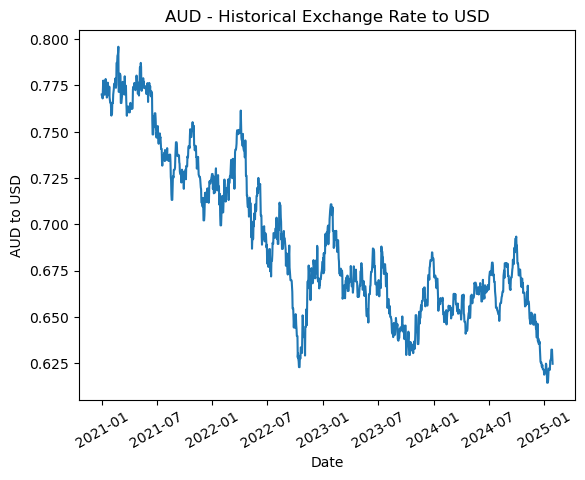

In [59]:
plt.plot(exch[exch['Currency'] == 'AUD']['Data Date'], exch[exch['Currency'] == 'AUD']['Rate to USD'])
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.ylabel('AUD to USD')
plt.title('AUD - Historical Exchange Rate to USD')
plt.show()

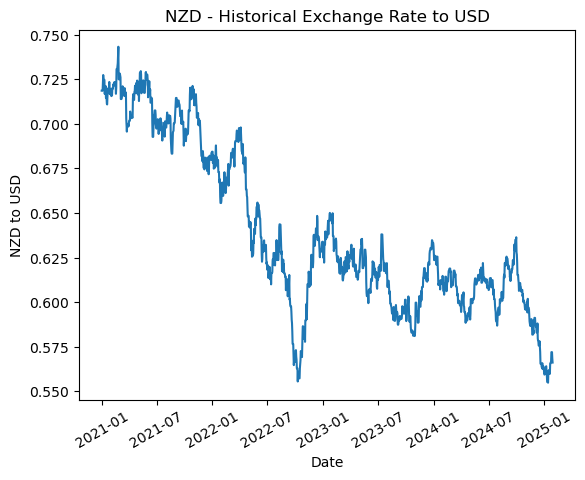

In [60]:
plt.plot(exch[exch['Currency'] == 'NZD']['Data Date'], exch[exch['Currency'] == 'NZD']['Rate to USD'])
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.ylabel('NZD to USD')
plt.title('NZD - Historical Exchange Rate to USD')
plt.show()

To make merging the DataFrames easier, we can convert all the currency abbreviations to lower case.

In [61]:
exch['Currency'] = exch['Currency'].apply(lambda x: x.lower())

## List of Currency Abbreviations

Reference for abbreviations: https://www.foreignexchangelive.com/currency-codes-symbols/

In [62]:
currencies = exch['Currency'].unique().tolist()
currencies

['aed',
 'afn',
 'all',
 'amd',
 'ang',
 'aoa',
 'ars',
 'aud',
 'awg',
 'azm',
 'azn',
 'bam',
 'bbd',
 'bdt',
 'bgn',
 'bhd',
 'bif',
 'bmd',
 'bnd',
 'bob',
 'brl',
 'bsd',
 'btn',
 'bwp',
 'byn',
 'bzd',
 'cad',
 'cdf',
 'chf',
 'clf',
 'clp',
 'cnh',
 'cny',
 'cop',
 'crc',
 'cup',
 'cve',
 'czk',
 'djf',
 'dkk',
 'dop',
 'dzd',
 'ecs',
 'egp',
 'etb',
 'eur',
 'fjd',
 'gbp',
 'gel',
 'ghs',
 'gmd',
 'gnf',
 'gtq',
 'gyd',
 'hkd',
 'hnl',
 'hrk',
 'htg',
 'huf',
 'idr',
 'ils',
 'inr',
 'iqd',
 'irr',
 'isk',
 'jmd',
 'jod',
 'jpy',
 'kes',
 'kgs',
 'khr',
 'kmf',
 'kpw',
 'krw',
 'kwd',
 'kyd',
 'kzt',
 'lak',
 'lbp',
 'lkr',
 'lrd',
 'lsl',
 'lyd',
 'mad',
 'mdl',
 'mga',
 'mkd',
 'mmk',
 'mnt',
 'mop',
 'mru',
 'mur',
 'mvr',
 'mwk',
 'mxn',
 'myr',
 'mzn',
 'nad',
 'ngn',
 'nio',
 'nok',
 'npr',
 'nzd',
 'omr',
 'pab',
 'pen',
 'pgk',
 'php',
 'pkr',
 'pln',
 'pyg',
 'qar',
 'ron',
 'rsd',
 'rub',
 'rwf',
 'sar',
 'sbd',
 'scr',
 'sdg',
 'sek',
 'sgd',
 'sll',
 'sos',
 'srd',


## Currencies not in Data Dictionary

Given that there is no dropdown menu to select currency in the "Currency if Other" field of the survey, there will be some entries that do not conform to the standard three-character currency abbreviations.

In [63]:
#initialize empty list
currency_outliers = []

#Iterate through "Curr_if_Other" column
for currency in df_csv['Curr_if_Other_clean'].tolist():

    #Check against list of currencies from Compustat
    if currency not in currencies:

        #Add currency to outliers list if it's not blank or already there
        if currency != '':
            
            currency_outliers.append(currency)
            
#Print length of outlier list            
print("Nonstandard currency entries: ",len(currency_outliers))

currency_outliers

Nonstandard currency entries:  64


['peso argentino',
 '$76,302.34',
 'my bonus is based on performance up to 10% of salary',
 'i work for an online state university, managing admissions data. not direct tech support.',
 '0',
 'na',
 'br$',
 'base plus commission',
 'indian rupees',
 'brl (r$)',
 'mexican pesos',
 'rsu / equity',
 'additonal = bonus plus stock',
 'american dollars',
 'pln (polish zloty)',
 'overtime (about 5 hours a week) and bonus',
 'czech crowns',
 'stock',
 'norwegian kroner (nok)',
 'ils/nis',
 '55,000',
 'aud & nzd are not the same currency...',
 'us dollar',
 'nis (new israeli shekel)',
 '-',
 'rmb (chinese yuan)',
 'taiwanese dollars',
 "aud and nzd aren't the same currency, and have absolutely nothing to do with each other :(",
 'philippine peso',
 'krw (korean won)',
 'ils (shekel)',
 '6000 in stock grants annually',
 'china rmb',
 'aud australian',
 'polish złoty',
 'philippine peso (php)',
 'australian dollars',
 'many non-salary benefits - travel, free healthcare for self, very low for fami

64 isn't a terribly high number of entries requiring correction, considering that there are 28106 entries in total.

We've already used a dictionary to substitute some of these values in the "Curr_if_Other_clean" column. If you'd like to be extra-thorough, you can go back to the dictionary `currency_dict` and replace more values.

If we look at specific values, we can also find some records with erroneous data entries. Some of them look like user error, but others look pretty deliberate:

In [64]:
df_csv[df_csv['Curr_if_Other']=='0']

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race,Curr_if_Other_clean,Currency_clean
1001,4/27/2021 11:18:27,35-44,Recruitment or HR,HR Manager/Accounts Payable,NaN,53500,0.0,usd,0,NaN,us,Minnesota,Minneapolis,11 - 20 years,2 - 4 years,College degree,Woman,White,0,usd


In [65]:
df_csv[df_csv['Curr_if_Other']=='ekignkfb']

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race,Curr_if_Other_clean,Currency_clean
28009,2/10/2024 15:04:31,25-34,"Accounting, Banking & Finance",mn jj,jmnjkkfd,15,0.0,usd,ekignkfb,dikfmklfb,dbfemf,"Alabama, Alaska, Arizona",dhgbfv,2 - 4 years,31 - 40 years,Some college,Woman,"Asian or Asian American, Black or African Amer...",ekignkfb,usd


In [66]:
df_csv[df_csv['Curr_if_Other']=='rice']

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race,Curr_if_Other_clean,Currency_clean
28021,3/20/2024 13:20:31,18-24,NaN,bum,supreme,10000000,299.0,usd,rice,ewad,usa,Alaska,Rice,41 years or more,8 - 10 years,"Professional degree (MD, JD, etc.)",Non-binary,White,rice,usd


In [67]:
df_csv[df_csv['Curr_if_Other']=='55,000']

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race,Curr_if_Other_clean,Currency_clean
9284,4/27/2021 17:36:26,45-54,Business or Consulting,Personal Executive Assistant,NaN,55,0.0,usd,"55,000",NaN,us,Michigan,Bloomfield Hills,21 - 30 years,11 - 20 years,College degree,Woman,White,"55,000",usd


In [68]:
df_csv[df_csv['Curr_if_Other']=='6000 in stock grants annually']

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race,Curr_if_Other_clean,Currency_clean
11734,4/28/2021 4:27:20,45-54,Transport or Logistics,HR Manager,NaN,104917,17000.0,usd,6000 in stock grants annually,NaN,us,Kansas,Tooeka,21 - 30 years,11 - 20 years,Master's degree,Woman,White,6000 in stock grants annually,usd


In [69]:
df_csv[df_csv['Curr_if_Other']=='47000']

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race,Curr_if_Other_clean,Currency_clean
26531,7/6/2021 18:49:41,25-34,Nonprofits,Districtwide Program Coordinator,NaN,47000,0.0,usd,47000,NaN,united states,Michigan,Decatur,8 - 10 years,8 - 10 years,Master's degree,Woman,White,47000,usd


# Trimming the `df_csv` Dataset

We're going to get rid of all the entries that don't have an official currency designation. The new DataFrame will be called `df_subset`.

In [70]:
df_subset = df_csv[df_csv['Currency'].isin(currencies)].reset_index().drop('index', axis=1)

In [71]:
df_subset

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,Country,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race,Curr_if_Other_clean,Currency_clean
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,usd,,NaN,united states,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,,usd
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,gbp,,NaN,united kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,,gbp
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,0.0,usd,,NaN,us,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,,usd
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,usd,,NaN,usa,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,,usd
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,usd,,NaN,us,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,,usd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27935,12/6/2024 19:52:27,35-44,Government and Public Administration,Station Commander,Station Commander of an Army Recruiting Team,70000,40000.0,usd,,"Housing Allowance, Food Allowance, and Special...",united states,"Florida, Georgia","Tifton, Valdosta, Jacksonville",21 - 30 years,8 - 10 years,Master's degree,Man,White,,usd
27936,12/16/2024 19:10:58,18-24,Engineering or Manufacturing,Clinical Specialist - Biomedical Engineer,NaN,75000,0.0,usd,,NaN,united stares,New York,New York City,2 - 4 years,1 year or less,Master's degree,Woman,White,,usd
27937,12/20/2024 6:16:27,55-64,Government and Public Administration,HMRC Engagement Lead,NaN,25000,0.0,gbp,,NaN,united kingdom,NaN,Suffolk,21 - 30 years,2 - 4 years,Some college,Woman,White,,gbp
27938,12/29/2024 23:50:26,25-34,Entertainment,Junior Editor,NaN,72800,0.0,usd,,NaN,united states,California,Los Angeles,5-7 years,5-7 years,Master's degree,Woman,"Hispanic, Latino, or Spanish origin, White",,usd


# Merging the Datasets

In [72]:
exch['Data Date']

0        2021-01-01
1        2021-01-01
2        2021-01-01
3        2021-01-01
4        2021-01-01
            ...    
228391   2025-01-28
228392   2025-01-28
228393   2025-01-28
228394   2025-01-28
228395   2025-01-28
Name: Data Date, Length: 228396, dtype: datetime64[ns]

The Compustat dataset has dates formatted "YYYY-MM-DD".

In [73]:
df_subset['Timestamp']

0         4/27/2021 11:02:10
1         4/27/2021 11:02:22
2         4/27/2021 11:02:38
3         4/27/2021 11:02:41
4         4/27/2021 11:02:42
                ...         
27935     12/6/2024 19:52:27
27936    12/16/2024 19:10:58
27937     12/20/2024 6:16:27
27938    12/29/2024 23:50:26
27939      1/3/2025 16:03:10
Name: Timestamp, Length: 27940, dtype: object

The timestamps in df_csv/df_subset are formatted "MM/DD/YYYY HH\:MM:SS". We will need to change these to the same format in order to merge our datasets.

## Timestamps: Python `datetime` and `dateutil`

Python's native `datetime` module can handle a large number of date formats, but its syntax isn't all that intuitive. The [`dateutil`](https://dateutil.readthedocs.io/en/stable/) module adds additional functionality to `datetime`, including a parser that can read dates from a variety of formats.

For more on these modules, see the first bonus notebook of this workshop, `PPW2 - Doctor Who.ipynb`.

In [74]:
#Format the original Timestamp string as a datetime object:
df_subset['Timestamp_YMD'] = df_subset['Timestamp'].apply(lambda x: dateutil.parser.parse(x))

#Reformat the resulting datetime object as a string that matches the currency exchange data format:
df_subset['Timestamp_YMD'] = df_subset['Timestamp_YMD'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))

In [75]:
df_subset['Timestamp_YMD']

0        2021-04-27
1        2021-04-27
2        2021-04-27
3        2021-04-27
4        2021-04-27
            ...    
27935    2024-12-06
27936    2024-12-16
27937    2024-12-20
27938    2024-12-29
27939    2025-01-03
Name: Timestamp_YMD, Length: 27940, dtype: object

In [76]:
df_subset.head()

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,...,US_State,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race,Curr_if_Other_clean,Currency_clean,Timestamp_YMD
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,usd,,NaN,...,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,,usd,2021-04-27
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,gbp,,NaN,...,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,,gbp,2021-04-27
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,0.0,usd,,NaN,...,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,,usd,2021-04-27
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,usd,,NaN,...,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,,usd,2021-04-27
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,usd,,NaN,...,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,,usd,2021-04-27


In [77]:
exch.head()

,Currency,Data Date,Rate to USD
0,aed,2021-01-01,0.272239
1,afn,2021-01-01,0.012970
2,all,2021-01-01,0.009893
3,amd,2021-01-01,0.001914
4,ang,2021-01-01,0.559447


In [78]:
#We are renaming the columns in the Compustat exchange rate dateset so we can merge onto the same columns in our survey:
exch.rename(columns={'Data Date':'Timestamp_YMD', "Currency":'Currency_clean'}, inplace=True)

In [79]:
#datetime.strftime formats a timestamp into a specified string format, in this case, YYYY-MM-DD
exch['Timestamp_YMD'] = exch['Timestamp_YMD'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))

In [80]:
exch['Timestamp_YMD'].describe()

count         228396
unique          1488
top       2021-01-01
freq             154
Name: Timestamp_YMD, dtype: object

In [81]:
df_subset['Timestamp_YMD'].describe()

count          27940
unique           525
top       2021-04-27
freq           11209
Name: Timestamp_YMD, dtype: object

## Pandas `.merge()`

[Pandas `.merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html) is a method that allows us to merge two dataframes on columns they have in common, in one of several distinct ways. This is essentially the same as a JOIN function with SQL, just written in a different syntax.

`.merge()` is one of the more powerful methods in Pandas, as it allows data from multiple sets to be combined to create a richer dataset.

In this case, we will be performing what's called a "left join", where we are adding values from the second DataFrame to the first DataFrame *only* where there are existing matching values. We are merging on two columns, currency and timestamp, so that for every survey response, we will get the exchange rate for each specific currency to USD on each specific day.


In [82]:
merged = pd.merge(left=df_subset, right=exch, how='left', on=['Currency_clean', 'Timestamp_YMD'])

In [83]:
merged

,Timestamp,Age,Industry,Job_Title,Addl_Context,Salary,Addl_Comp,Currency,Curr_if_Other,Income_Context,...,City,Work_Exp,Field_Exp,Educ_Level,Gender,Race,Curr_if_Other_clean,Currency_clean,Timestamp_YMD,Rate to USD
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,usd,,NaN,...,Boston,5-7 years,5-7 years,Master's degree,Woman,White,,usd,2021-04-27,1.0000
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,gbp,,NaN,...,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,,gbp,2021-04-27,1.3921
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,0.0,usd,,NaN,...,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,,usd,2021-04-27,1.0000
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,usd,,NaN,...,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,,usd,2021-04-27,1.0000
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,usd,,NaN,...,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,,usd,2021-04-27,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27935,12/6/2024 19:52:27,35-44,Government and Public Administration,Station Commander,Station Commander of an Army Recruiting Team,70000,40000.0,usd,,"Housing Allowance, Food Allowance, and Special...",...,"Tifton, Valdosta, Jacksonville",21 - 30 years,8 - 10 years,Master's degree,Man,White,,usd,2024-12-06,1.0000
27936,12/16/2024 19:10:58,18-24,Engineering or Manufacturing,Clinical Specialist - Biomedical Engineer,NaN,75000,0.0,usd,,NaN,...,New York City,2 - 4 years,1 year or less,Master's degree,Woman,White,,usd,2024-12-16,1.0000
27937,12/20/2024 6:16:27,55-64,Government and Public Administration,HMRC Engagement Lead,NaN,25000,0.0,gbp,,NaN,...,Suffolk,21 - 30 years,2 - 4 years,Some college,Woman,White,,gbp,2024-12-20,1.2572
27938,12/29/2024 23:50:26,25-34,Entertainment,Junior Editor,NaN,72800,0.0,usd,,NaN,...,Los Angeles,5-7 years,5-7 years,Master's degree,Woman,"Hispanic, Latino, or Spanish origin, White",,usd,2024-12-29,1.0000


In [84]:
merged['Rate to USD'].describe()

count    27940.000000
mean         1.008499
std          0.123523
min          0.008754
25%          1.000000
50%          1.000000
75%          1.000000
max          1.418300
Name: Rate to USD, dtype: float64

Our summary statistics don't tell us much about "Rate to USD", since most of the entries are already USD. However, we'll be multiplying the Salary and Total_Comp variables by these exchange rates in order to get our normalized compensation variables.

# The Payoff - Salary Summary Statistics

In [85]:
merged['Total_Comp'] = merged['Salary'] + merged['Addl_Comp']

In [86]:
merged['Salary_USD'] = merged['Salary'] * merged['Rate to USD']

In [87]:
merged['Total_Comp_USD'] = merged['Total_Comp'] * merged['Rate to USD']

In [88]:
merged[['Salary','Total_Comp','Salary_USD', 'Total_Comp_USD']].describe()

,Salary,Total_Comp,Salary_USD,Total_Comp_USD
count,2.794000e+04,2.794000e+04,2.794000e+04,2.794000e+04
mean,3.135098e+05,3.225285e+05,2.505474e+05,2.593627e+05
std,3.590108e+07,3.590112e+07,2.636934e+07,2.636934e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.400000e+04,5.500000e+04,5.408000e+04,5.527818e+04
50%,7.500000e+04,7.879300e+04,7.500000e+04,7.783344e+04
75%,1.085000e+05,1.150000e+05,1.070000e+05,1.145480e+05
max,6.000070e+09,6.000070e+09,4.406588e+09,4.406588e+09


Before converting to a unified currency, summary statistics for "Salary" and "Total_Comp" were meaningless. Adj_Salary_USD and Adj_Total_Comp_USD have been normalized to reflect the exchange rate from the original currency to USD at the time the survey was taken.

# Wrap-up & Questions

## What else do you think we could do to improve the quality of the data and/or the accuracy of these statistics?

## What other sorts of data analysis do you think we could do with the data in this dataset?

# Other Example Projects Using the "Ask A Manager" Dataset

A quick search yielded a few projects other people had done to analyze this dataset.

What are their goals? What do they do differently? How do they address the problem of cleaning the data?

https://annasanders.github.io/ms_projects/dtsa_5505/Data_Mining_Project_Report_final.pdf

https://github.com/brightboy373/Cleaning-and-Exploring-the-Ask-a-Manager-Survey-Dataset

https://github.com/maggiewolff/ask-a-manager-salary-survey

https://github.com/shaecodes/Ask-A-Manager

This one is done in R:

https://jtr13.github.io/cc19/ask-a-manager-salary-survey-dataset.html


# End of Module 1